In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

In [3]:
# Load your CSV
df = pd.read_csv("assignment_result.csv")

# Prepare containers
summary = {
    "Target Return(%)": [],
    "Mean OOS Return(%)": [],
    "MAE OOS Mean(%)": [],
    "Avg OOS Variance(%)": [],
}

# Loop through each unique target return
for target in sorted(df["Target Return"].unique()):
    sub_df = df[df["Target Return"] == target]
    
    mae = (sub_df["OOS Mean"] - target).abs().mean()
    var_avg = sub_df["OOS Variance"].mean()
    oos_mean_avg = sub_df["OOS Mean"].mean()
    
    summary["Target Return(%)"].append(target*100)
    summary["MAE OOS Mean(%)"].append(mae*100)
    summary["Avg OOS Variance(%)"].append(var_avg*100)
    summary["Mean OOS Return(%)"].append(oos_mean_avg*100)

# Convert to summary DataFrame
summary_df = pd.DataFrame(summary)
print(summary_df)

    Target Return(%)  Mean OOS Return(%)  MAE OOS Mean(%)  Avg OOS Variance(%)
0                0.5            0.252152         0.433508             0.044070
1                1.0            0.353944         0.774304             0.091190
2                1.5            0.429962         1.137814             0.146902
3                2.0            0.543018         1.542878             0.239498
4                2.5            0.591190         1.982362             0.364316
5                3.0            0.596474         2.485954             0.524300
6                3.5            0.721756         2.872344             0.711586
7                4.0            0.847674         3.352790             0.934562
8                4.5            0.927530         3.779814             1.188868
9                5.0            0.988318         4.268754             1.456446
10               5.5            1.019632         4.761720             1.826376
11               6.0            1.062820         5.2

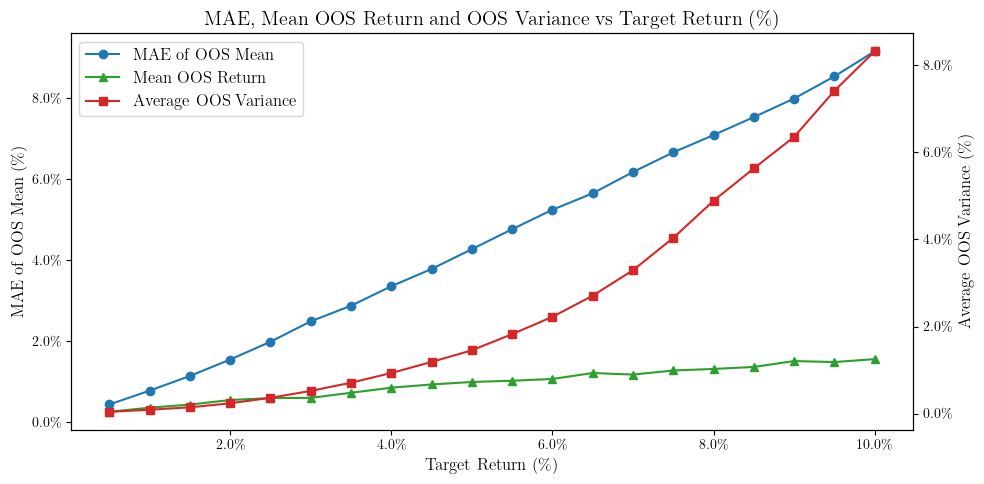

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Left axis for MAE and Mean OOS Return
color_mae = '#1f77b4'
color_mean = '#2ca02c'

ax1.set_xlabel(r"Target Return (\%)")
ax1.set_ylabel(r"MAE of OOS Mean (\%)")
ax1.plot(summary_df["Target Return(%)"], summary_df["MAE OOS Mean(%)"], marker='o', color=color_mae, label="MAE of OOS Mean")
ax1.tick_params(axis='y')
ax1.yaxis.set_major_formatter(PercentFormatter(decimals=1))

# Plot Mean OOS Return on same left axis
ax1.plot(summary_df["Target Return(%)"], summary_df["Mean OOS Return(%)"], marker='^', color=color_mean, label="Mean OOS Return")

# Right axis for Average OOS Variance
ax2 = ax1.twinx()
color_var = '#d62728'
ax2.set_ylabel(r"Average OOS Variance (\%)")
ax2.plot(summary_df["Target Return(%)"], summary_df["Avg OOS Variance(%)"], marker='s', color=color_var, label="Average OOS Variance")
ax2.tick_params(axis='y')
ax2.yaxis.set_major_formatter(PercentFormatter(decimals=1))

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
ax1.xaxis.set_major_formatter(PercentFormatter(decimals=1))

plt.title(r"MAE, Mean OOS Return and OOS Variance vs Target Return (\%)")
fig.tight_layout()
plt.savefig("comparisions.png", dpi=300, bbox_inches='tight')
plt.show()

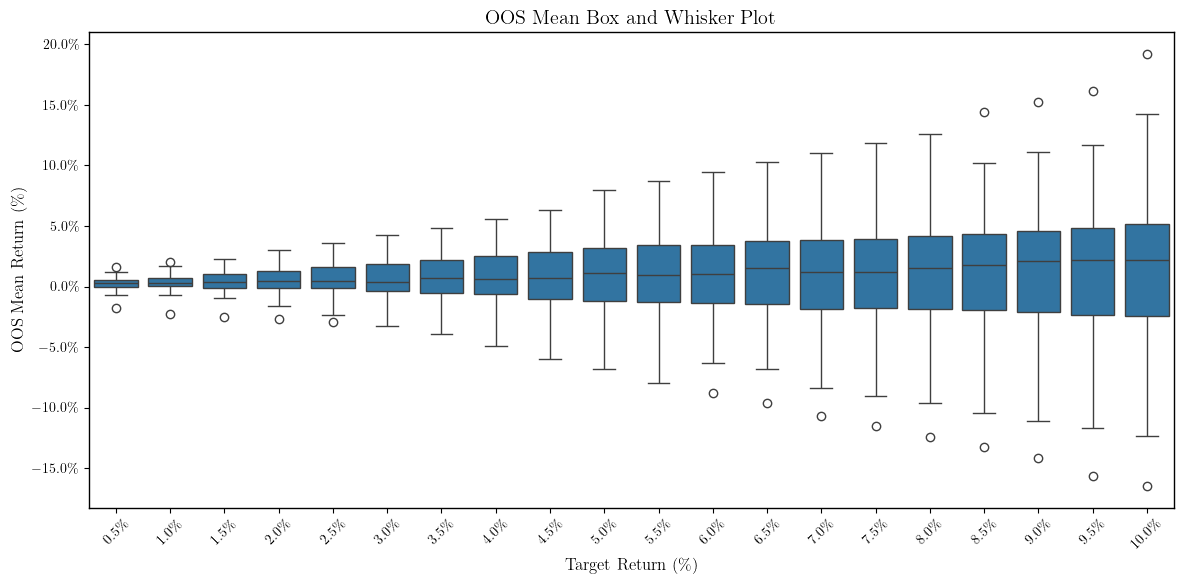

In [11]:
sorted_targets = df["Target Return"].unique()
formatted_labels = [rf"{x*100:.1f}\%" for x in sorted_targets]

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x="Target Return", y="OOS Mean", ax=ax, color="#1f77b4")

# Set custom x-ticks and labels
ax.set_xticks(range(len(sorted_targets)))
ax.set_xticklabels(formatted_labels)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=1))

ax.set_xlabel(r"Target Return (\%)")
ax.set_ylabel(r"OOS Mean Return (\%)")
plt.xticks(rotation=45)

for spine in ax.spines.values():
    spine.set_linewidth(1)

plt.title(r"OOS Mean Box and Whisker Plot")
plt.tight_layout()
plt.savefig("boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

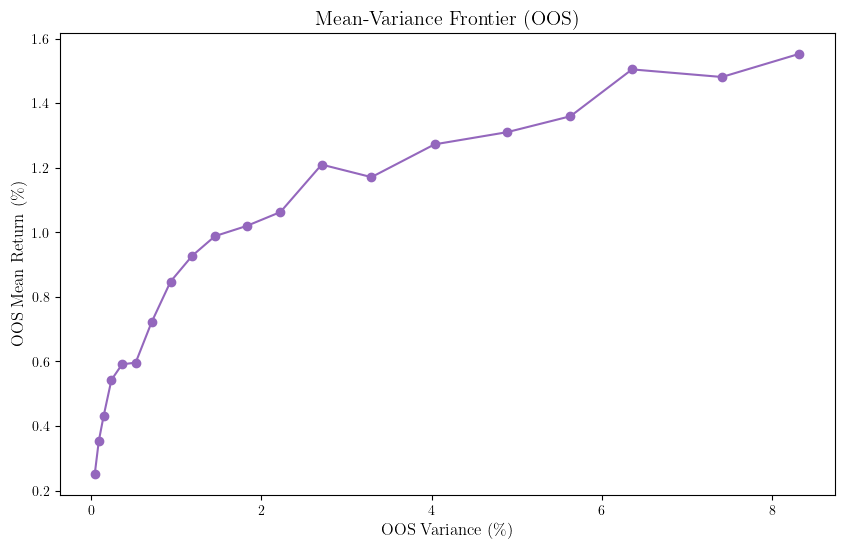

In [7]:
# Create a new DataFrame for plotting (to avoid altering summary_df)
plot_df = summary_df.copy()

plt.figure(figsize=(10, 6))
plt.plot(plot_df["Avg OOS Variance(%)"], plot_df["Mean OOS Return(%)"], marker='o', linestyle='-', color='#9467bd')

plt.xlabel(r"OOS Variance (\%)")
plt.ylabel(r"OOS Mean Return (\%)")
plt.title(r"Mean-Variance Frontier (OOS)")
plt.grid(False)

plt.savefig("meanvarfront.png", dpi=300, bbox_inches='tight')
plt.show()